#Link with Google Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/EVA4/S9

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/EVA4/S9


In [6]:
!pwd

/content/drive/My Drive/EVA4/S9


#Data abstraction and transform

In [0]:
%matplotlib inline

In [8]:
import pullData
pullData.analyseCIFAR10()

Extracting ./data/cifar-10-python.tar.gz to ./data
 - Numpy Shape: (50000, 32, 32, 3)
[CHANNEL 0]
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.4915)
 - std: tensor(0.2470)
 - var: tensor(0.0610)
[CHANNEL 1]
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.4823)
 - std: tensor(0.2435)
 - var: tensor(0.0593)
[CHANNEL 2]
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.4468)
 - std: tensor(0.2616)
 - var: tensor(0.0684)


In [0]:
from AlbumentationTransform import *
train_transforms = AlbumentationTransform(1)
test_transforms = AlbumentationTransform(0)


In [10]:
trainloader,  testloader, classes = pullData.pullCIFAR10(train_transforms, test_transforms)

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


#Model Summary

In [12]:
import torch
from torchsummary import summary

from resnet import *

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
Mymodel = ResNet18().to(device)

if device == 'cuda':
    Mymodel = torch.nn.DataParallel(Mymodel)
    cudnn.benchmark = True
summary(Mymodel, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

#Train the Model

In [13]:
import trainAndTest
trainAndTest.trainModel(20,Mymodel, device, trainloader, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.3064565658569336 Batch_id=390 Accuracy=46.69: 100%|██████████| 391/391 [00:52<00:00,  7.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -3.8203, Accuracy: 5795/10000 (57.95%)

EPOCH: 1


Loss=0.7747105360031128 Batch_id=390 Accuracy=67.94: 100%|██████████| 391/391 [00:53<00:00,  7.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.6010, Accuracy: 6418/10000 (64.18%)

EPOCH: 2


Loss=0.818752110004425 Batch_id=390 Accuracy=76.05: 100%|██████████| 391/391 [00:54<00:00,  7.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.7872, Accuracy: 7561/10000 (75.61%)

EPOCH: 3


Loss=0.3473550081253052 Batch_id=390 Accuracy=80.56: 100%|██████████| 391/391 [00:54<00:00,  7.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -7.6241, Accuracy: 7847/10000 (78.47%)

EPOCH: 4


Loss=0.7625972628593445 Batch_id=390 Accuracy=83.86: 100%|██████████| 391/391 [00:55<00:00,  7.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -7.7131, Accuracy: 7752/10000 (77.52%)

EPOCH: 5


Loss=0.31937074661254883 Batch_id=390 Accuracy=85.94: 100%|██████████| 391/391 [00:55<00:00,  7.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -8.9340, Accuracy: 8310/10000 (83.10%)

EPOCH: 6


Loss=0.2412574291229248 Batch_id=390 Accuracy=87.82: 100%|██████████| 391/391 [00:55<00:00,  7.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.2452, Accuracy: 8321/10000 (83.21%)

EPOCH: 7


Loss=0.2489124834537506 Batch_id=390 Accuracy=89.68: 100%|██████████| 391/391 [00:55<00:00,  7.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -10.3417, Accuracy: 8209/10000 (82.09%)

EPOCH: 8


Loss=0.1554342806339264 Batch_id=390 Accuracy=90.68: 100%|██████████| 391/391 [00:55<00:00,  7.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.3724, Accuracy: 8372/10000 (83.72%)

EPOCH: 9


Loss=0.09097622334957123 Batch_id=390 Accuracy=95.24: 100%|██████████| 391/391 [00:55<00:00,  7.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.9911, Accuracy: 8788/10000 (87.88%)

EPOCH: 10


Loss=0.10278798639774323 Batch_id=390 Accuracy=96.35: 100%|██████████| 391/391 [00:55<00:00,  7.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.4985, Accuracy: 8772/10000 (87.72%)

EPOCH: 11


Loss=0.09403868019580841 Batch_id=390 Accuracy=96.84: 100%|██████████| 391/391 [00:55<00:00,  7.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.5798, Accuracy: 8807/10000 (88.07%)

EPOCH: 12


Loss=0.031569529324769974 Batch_id=390 Accuracy=97.44: 100%|██████████| 391/391 [00:55<00:00,  7.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.9011, Accuracy: 8809/10000 (88.09%)

EPOCH: 13


Loss=0.0627271831035614 Batch_id=390 Accuracy=97.87: 100%|██████████| 391/391 [00:55<00:00,  7.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -13.4207, Accuracy: 8829/10000 (88.29%)

EPOCH: 14


Loss=0.03710822016000748 Batch_id=390 Accuracy=98.13: 100%|██████████| 391/391 [00:55<00:00,  7.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -13.6386, Accuracy: 8824/10000 (88.24%)

EPOCH: 15


Loss=0.02196270227432251 Batch_id=390 Accuracy=98.33: 100%|██████████| 391/391 [00:55<00:00,  7.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -13.8765, Accuracy: 8812/10000 (88.12%)

EPOCH: 16


Loss=0.06421121209859848 Batch_id=390 Accuracy=98.65: 100%|██████████| 391/391 [00:55<00:00,  7.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -14.3296, Accuracy: 8819/10000 (88.19%)

EPOCH: 17


Loss=0.037853360176086426 Batch_id=390 Accuracy=98.72: 100%|██████████| 391/391 [00:55<00:00,  7.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -14.1943, Accuracy: 8828/10000 (88.28%)

EPOCH: 18


Loss=0.012766438536345959 Batch_id=390 Accuracy=99.04: 100%|██████████| 391/391 [00:55<00:00,  7.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -14.3469, Accuracy: 8836/10000 (88.36%)

EPOCH: 19


Loss=0.014402562752366066 Batch_id=390 Accuracy=99.11: 100%|██████████| 391/391 [00:55<00:00,  7.05it/s]



Test set: Average loss: -14.3259, Accuracy: 8852/10000 (88.52%)



#Labels Test Accuracy

In [14]:
trainAndTest.ClassLabelAccuracy(device, Mymodel, testloader, classes)

Accuracy of plane : 86 %
Accuracy of   car : 96 %
Accuracy of  bird : 78 %
Accuracy of   cat : 63 %
Accuracy of  deer : 88 %
Accuracy of   dog : 85 %
Accuracy of  frog : 90 %
Accuracy of horse : 94 %
Accuracy of  ship : 100 %
Accuracy of truck : 91 %


GradCAM Test

Class label    :  frog
activation Size :  (8, 8, 256)
Pedicted label :  frog


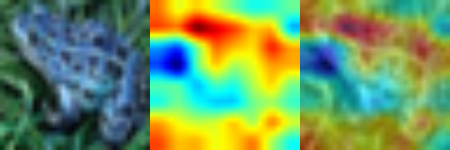

     ACTUAL          GRADCAM           Gradcam+Image


In [16]:
from GradCAM import GradCAM

model = Mymodel.to('cpu')
gradcam = GradCAM(model, model.layer3, classes)

img, labels = next(iter(testloader))

imageInput = img[0,:].reshape(1,3,32,32)
print("Class label    : ", classes[labels[0].item()])

cam, heatmap, pred = gradcam.forward(imageInput, retain_graph=True)
print("Pedicted label : ", classes[pred])
gradcam.visualiseGradcam(heatmap, imageInput)
